In [1]:
import spacy

In [5]:
# Load the fine-tuned model
nlp_custom = spacy.load("0fner_model_custom_1")

# Test the model with a sample tweet
doc = nlp_custom("The aftershock pattern in purple suggests that the M. Noto  earthquake ruptured bilaterally, with the preliminary NEIC slip model also indicating slip on both sides of the epicenter")
for ent in doc.ents:
    print(ent.text, ent.label_)

The aftershock pattern in purple suggests that the M. Noto  earthquake ruptured bilaterally, with the preliminary NEIC slip model also indicating slip on both sides of the epicenter GPE


In [2]:
import spacy
from spacy.training import Example
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the test data from the .jsonl file
def load_test_data(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    test_data = []
    for line in lines:
        entry = json.loads(line)
        text = entry[0]
        entities = entry[1]["entities"]
        test_data.append((text, {"entities": entities}))
    return test_data

# Function to convert test data into spaCy Example format
def create_test_examples(nlp, test_data):
    examples = []
    for text, annotations in test_data:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        examples.append(example)
    return examples



In [22]:
# nlp = spacy.load("0fner_model_custom_2")
# nlp2 = spacy.load("0fner_model_custom_3")
# nlp3 = spacy.load("en_core_web_lg")
# nlp4 = spacy.load("en_core_web_md")
nlp5 = spacy.load("en_core_web_trf")
nlp = [nlp5]

In [4]:
import json

# Function to remove duplicate entities
def remove_duplicate_entities(records):
    for record in records:
        text, annotations = record
        unique_entities = []
        seen = set()
        for entity in annotations['entities']:
            entity_tuple = tuple(entity)  # Convert the list to a tuple so it can be added to the set
            if entity_tuple not in seen:
                unique_entities.append(entity)
                seen.add(entity_tuple)
        annotations['entities'] = unique_entities
    return records

# Function to read data from a .jsonl file
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data

# Function to load and clean test data
def load_and_clean_test_data(file_path):
    data = read_jsonl(file_path)
    cleaned_data = remove_duplicate_entities(data)
    return cleaned_data


In [11]:
import json

# Function to remove duplicate and overlapping entities, keeping the shortest one
def remove_duplicate_and_overlapping_entities(records):
    for record in records:
        text, annotations = record
        unique_entities = []
        seen = set()

        # Sort entities by start index and then by length (to prioritize shorter entities in case of overlap)
        sorted_entities = sorted(annotations['entities'], key=lambda x: (x[0], x[1] - x[0]))

        for entity in sorted_entities:
            start, end, label = entity
            entity_tuple = (start, end, label)  # Convert the list to a tuple for uniqueness checking

            # Check for overlap with existing unique entities
            overlap = any(
                (start < u_end and end > u_start)  # Overlap condition
                for u_start, u_end, _ in unique_entities
            )

            # If no overlap and entity is not a duplicate, add it
            if not overlap and entity_tuple not in seen:
                unique_entities.append(entity)
                seen.add(entity_tuple)
        
        annotations['entities'] = unique_entities
    return records

# Function to read data from a .jsonl file
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data

# Function to load and clean test data
def load_and_clean_test_data(file_path):
    data = read_jsonl(file_path)
    cleaned_data = remove_duplicate_and_overlapping_entities(data)
    return cleaned_data


In [23]:

# Load test data and create examples
test_data = load_and_clean_test_data("test/filtered_tagged_texts.jsonl")
test_examples = create_test_examples(nlp5, test_data)

C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Huge tsunami warning issued to Noto region of Japa..." with entities "[[46, 51, 'GPE'], [53, 61, 'GPE'], [230, 235, 'GPE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "The Japanese students have organised a Bake Sale, ..." with entities "[[4, 9, 'GPE'], [207, 213, 'GPE']]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\spacy\training\iob_utils.py:149: 

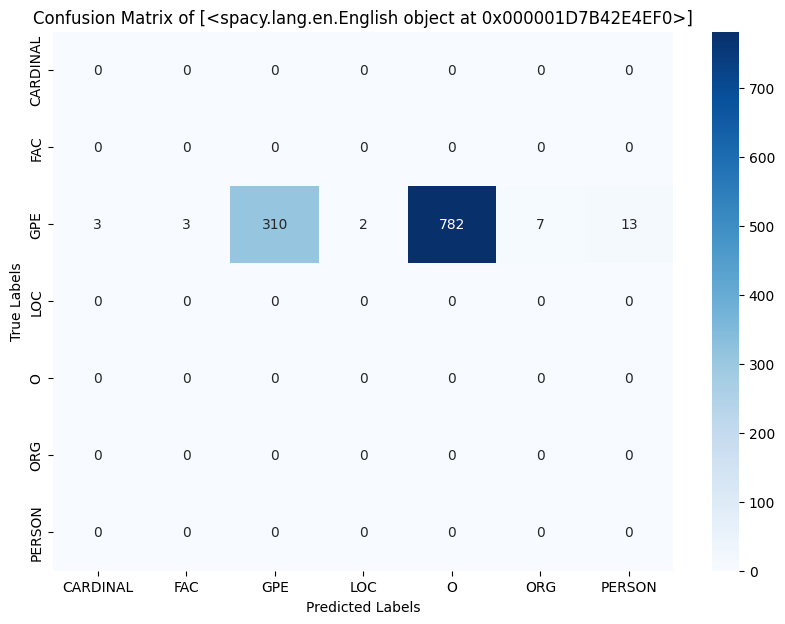

              precision    recall  f1-score   support

    CARDINAL       0.00      0.00      0.00         0
         FAC       0.00      0.00      0.00         0
         GPE       1.00      0.28      0.43      1120
         LOC       0.00      0.00      0.00         0
           O       0.00      0.00      0.00         0
         ORG       0.00      0.00      0.00         0
      PERSON       0.00      0.00      0.00         0

    accuracy                           0.28      1120
   macro avg       0.14      0.04      0.06      1120
weighted avg       1.00      0.28      0.43      1120



C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:


# Extract true and predicted labels
true_entities = []
predicted_entities = []

for example in test_examples:
    # True entities
    true_ents = [(ent.start_char, ent.end_char, ent.label_) for ent in example.reference.ents]
    true_entities.append(true_ents)  # Append list of true entities for this example
    
    # Predicted entities
    pred_doc = nlp5(example.text)
    pred_ents = [(ent.start_char, ent.end_char, ent.label_) for ent in pred_doc.ents]
    predicted_entities.append(pred_ents)  # Append list of predicted entities for this example

# Align true and predicted entities
aligned_true = []
aligned_pred = []

for true_ents, pred_ents in zip(true_entities, predicted_entities):
    true_labels = ['O'] * len(true_ents)
    pred_labels = ['O'] * len(true_ents)  # Initialize predictions as 'O' (no entity)
    
    for i, (true_start, true_end, true_label) in enumerate(true_ents):
        true_labels[i] = true_label  # Assign the true label
        
        # Check if there is a matching predicted entity at this location
        for pred_start, pred_end, pred_label in pred_ents:
            if pred_start == true_start and pred_end == true_end:
                pred_labels[i] = pred_label  # Assign the predicted label
                
    # Add the aligned labels for this sentence
    aligned_true.extend(true_labels)
    aligned_pred.extend(pred_labels)

# Create a mapping from labels to indices
labels = sorted(set(aligned_true + aligned_pred))
label_to_index = {label: i for i, label in enumerate(labels)}

# Convert labels to indices for confusion matrix
true_indices = [label_to_index[label] for label in aligned_true]
pred_indices = [label_to_index[label] for label in aligned_pred]

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_indices, pred_indices)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix of {nlp}')
plt.show()

# Print classification report for more detailed metrics
print(classification_report(true_indices, pred_indices, target_names=labels))

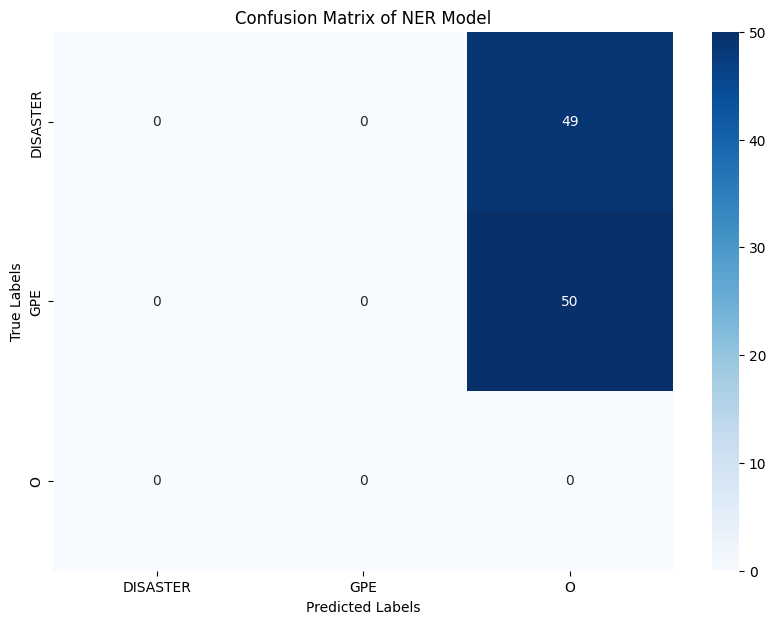

C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

              precision    recall  f1-score   support

    DISASTER       0.00      0.00      0.00      49.0
         GPE       0.00      0.00      0.00      50.0
           O       0.00      0.00      0.00       0.0

    accuracy                           0.00      99.0
   macro avg       0.00      0.00      0.00      99.0
weighted avg       0.00      0.00      0.00      99.0



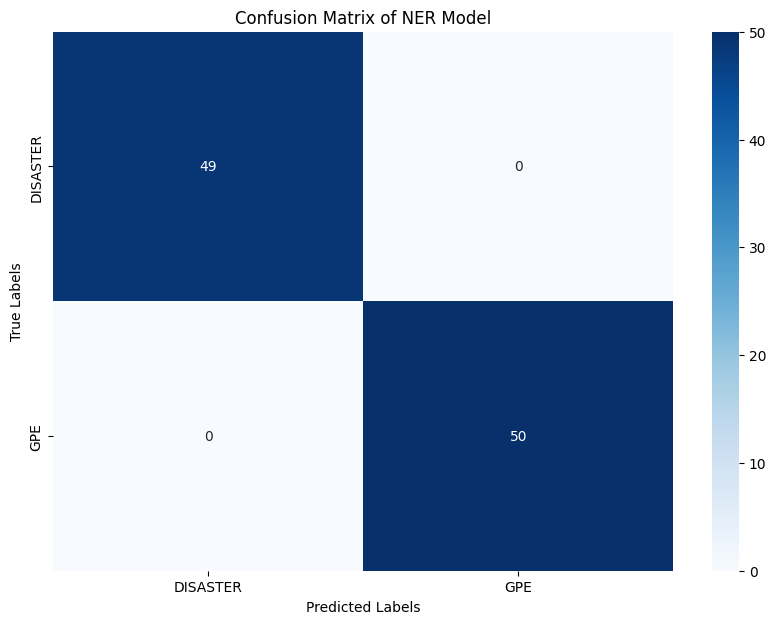

              precision    recall  f1-score   support

    DISASTER       1.00      1.00      1.00        49
         GPE       1.00      1.00      1.00        50

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



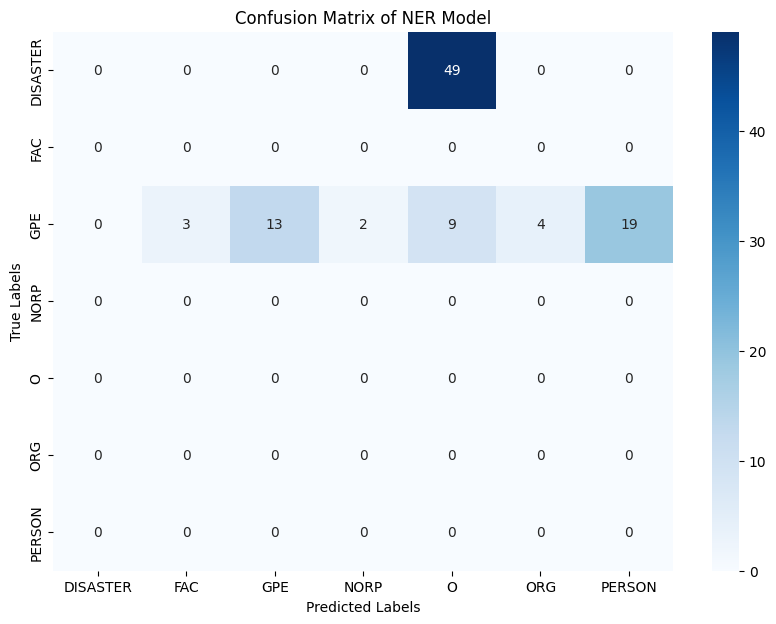

C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

              precision    recall  f1-score   support

    DISASTER       0.00      0.00      0.00        49
         FAC       0.00      0.00      0.00         0
         GPE       1.00      0.26      0.41        50
        NORP       0.00      0.00      0.00         0
           O       0.00      0.00      0.00         0
         ORG       0.00      0.00      0.00         0
      PERSON       0.00      0.00      0.00         0

    accuracy                           0.13        99
   macro avg       0.14      0.04      0.06        99
weighted avg       0.51      0.13      0.21        99



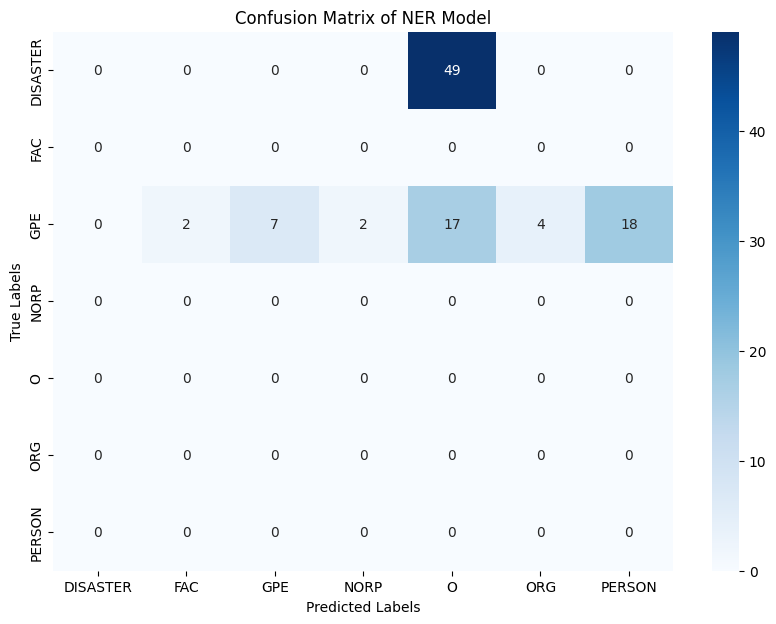

C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

              precision    recall  f1-score   support

    DISASTER       0.00      0.00      0.00        49
         FAC       0.00      0.00      0.00         0
         GPE       1.00      0.14      0.25        50
        NORP       0.00      0.00      0.00         0
           O       0.00      0.00      0.00         0
         ORG       0.00      0.00      0.00         0
      PERSON       0.00      0.00      0.00         0

    accuracy                           0.07        99
   macro avg       0.14      0.02      0.04        99
weighted avg       0.51      0.07      0.12        99



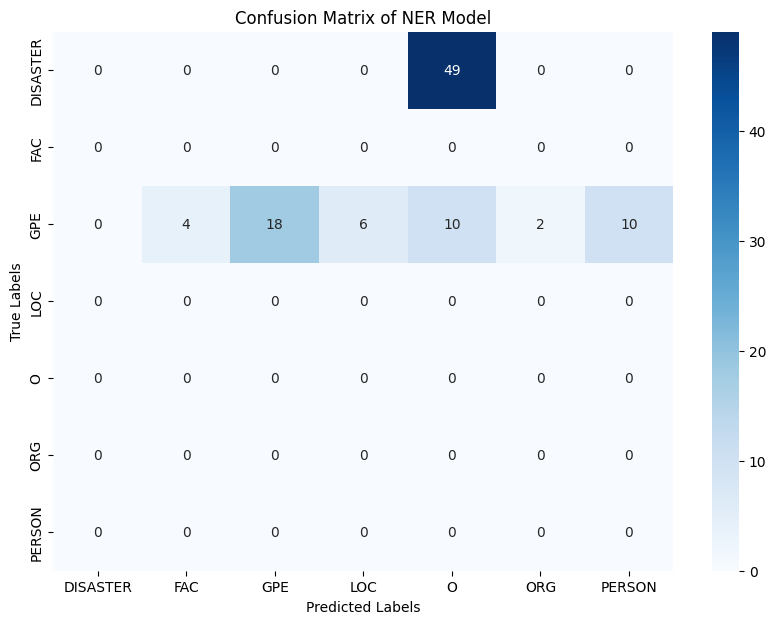

              precision    recall  f1-score   support

    DISASTER       0.00      0.00      0.00        49
         FAC       0.00      0.00      0.00         0
         GPE       1.00      0.36      0.53        50
         LOC       0.00      0.00      0.00         0
           O       0.00      0.00      0.00         0
         ORG       0.00      0.00      0.00         0
      PERSON       0.00      0.00      0.00         0

    accuracy                           0.18        99
   macro avg       0.14      0.05      0.08        99
weighted avg       0.51      0.18      0.27        99



C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [125]:
for nlp in nlp:
    # Load test data and create examples
    test_data = load_test_data("trrain.jsonl")
    test_examples = create_test_examples(nlp, test_data[:1000])

    # Extract true and predicted labels
    true_entities = []
    predicted_entities = []

    for example in test_examples:
        # True entities
        true_ents = [(ent.start_char, ent.end_char, ent.label_) for ent in example.reference.ents]
        true_entities.append(true_ents)  # Append list of true entities for this example
        
        # Predicted entities
        pred_doc = nlp(example.text)
        pred_ents = [(ent.start_char, ent.end_char, ent.label_) for ent in pred_doc.ents]
        predicted_entities.append(pred_ents)  # Append list of predicted entities for this example

    # Align true and predicted entities
    aligned_true = []
    aligned_pred = []

    for true_ents, pred_ents in zip(true_entities, predicted_entities):
        true_labels = ['O'] * len(true_ents)
        pred_labels = ['O'] * len(true_ents)  # Initialize predictions as 'O' (no entity)
        
        for i, (true_start, true_end, true_label) in enumerate(true_ents):
            true_labels[i] = true_label  # Assign the true label
            
            # Check if there is a matching predicted entity at this location
            for pred_start, pred_end, pred_label in pred_ents:
                if pred_start == true_start and pred_end == true_end:
                    pred_labels[i] = pred_label  # Assign the predicted label
                    
        # Add the aligned labels for this sentence
        aligned_true.extend(true_labels)
        aligned_pred.extend(pred_labels)

    # Create a mapping from labels to indices
    labels = sorted(set(aligned_true + aligned_pred))
    label_to_index = {label: i for i, label in enumerate(labels)}

    # Convert labels to indices for confusion matrix
    true_indices = [label_to_index[label] for label in aligned_true]
    pred_indices = [label_to_index[label] for label in aligned_pred]

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(true_indices, pred_indices)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix of NER Model')
    plt.show()

    # Print classification report for more detailed metrics
    print(classification_report(true_indices, pred_indices, target_names=labels))

In [26]:
import spacy
from spacy.training import offsets_to_biluo_tags

# Load the spaCy model
nlp = spacy.blank("en")

# Example text and entities
text = "Mild tremors felt in Mumbai. Stay safe everyone! #earthquakeAlert"
entities = [(21, 27, 'GPE'), (0, 12, 'DISASTER')]  # Updated indices


# Create a spaCy Doc object
doc = nlp(text)

# Check for alignment using offsets_to_biluo_tags
tags = offsets_to_biluo_tags(doc, entities)

# Output the tags to check if they align properly
print(tags)


['B-DISASTER', 'L-DISASTER', 'O', 'O', 'U-GPE', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [34]:
nlp = spacy.load("en_core_web_sm")

# Get the NER component
ner = nlp.get_pipe("ner")

# List all entity labels the NER recognizes
entity_labels = ner.labels
print(entity_labels)

('CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART')
